In [1]:
import sys

import random
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

sys.path.insert(0, './utilities/random_city.py')
from utilities.random_city import *
sys.path.insert(0, './utilities/simple_graph.py')
from utilities.simple_graph import *
sys.path.insert(0, './utilities/manoeuvre_graph.py')
from utilities.manoeuvre_graph import *

sys.path.insert(0, './utilities/inverted_graph.py')
from utilities.inverted_graph import *

sys.path.insert(0, './utilities/graph_manipulation.py')
from utilities.graph_manipulation import *

random.seed(0)

In [2]:
random_city = get_random_city(
    city_size=[24, 16],
    frequencies=[0.3, 0.1, 0.1, 0.5]
    )

random_district = select_random_district(
        city=random_city,
        city_size=[24, 16],
        district_size=[12, 8],
        )

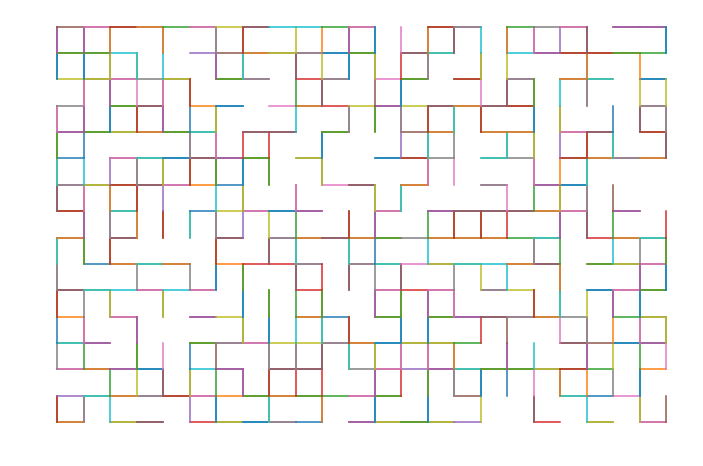

In [3]:
plot_area(random_city)

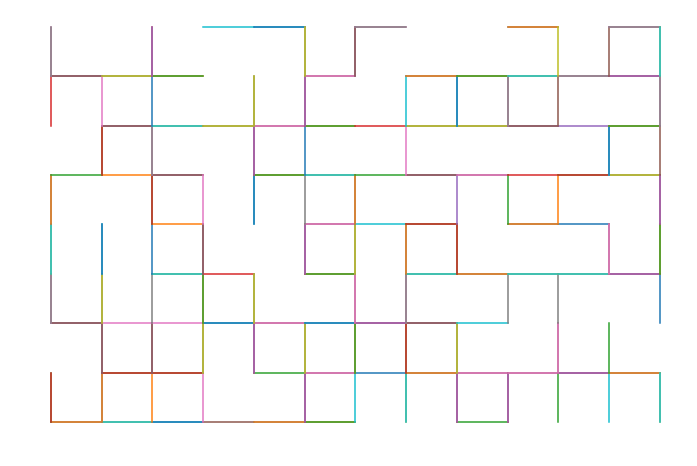

In [4]:
plot_area(random_district)

In [5]:
city_g = get_manoeuvre_graph(random_city)
district_g = get_manoeuvre_graph(random_district)

In [6]:
# manoeuvre_graph.edges()

In [7]:
# bad_nodes = get_manoeuvre_graph_statistics(manoeuvre_graph)

164 disconnected nodes
1382 straight drives
501 right turns
514 left turns
724 u-turns
68 dead ends


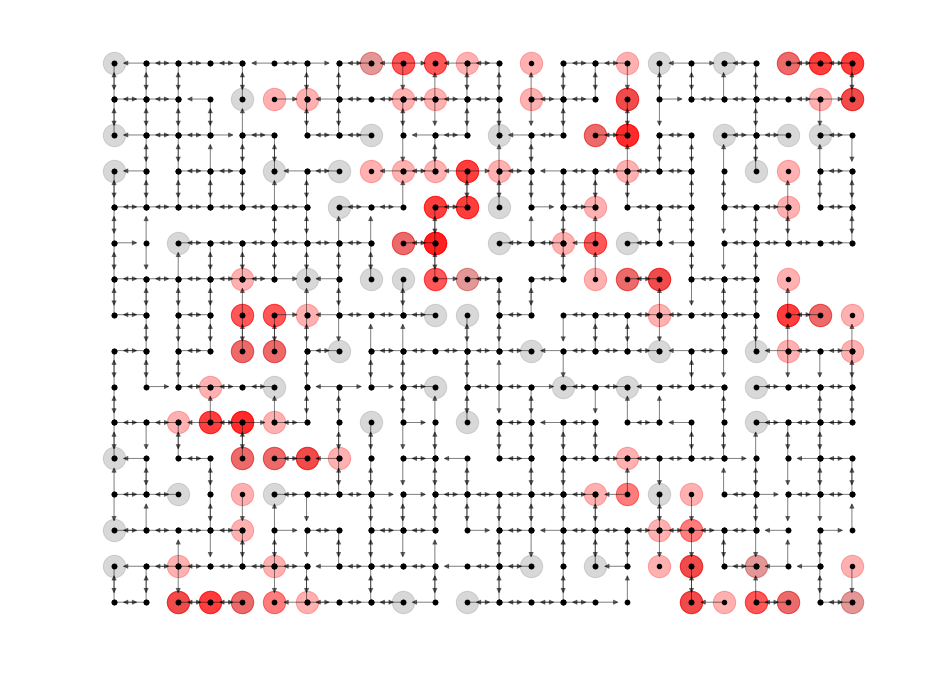

In [8]:
visualise_manoeuvre_graph(city_g)

46 disconnected nodes
411 straight drives
143 right turns
152 left turns
216 u-turns
21 dead ends


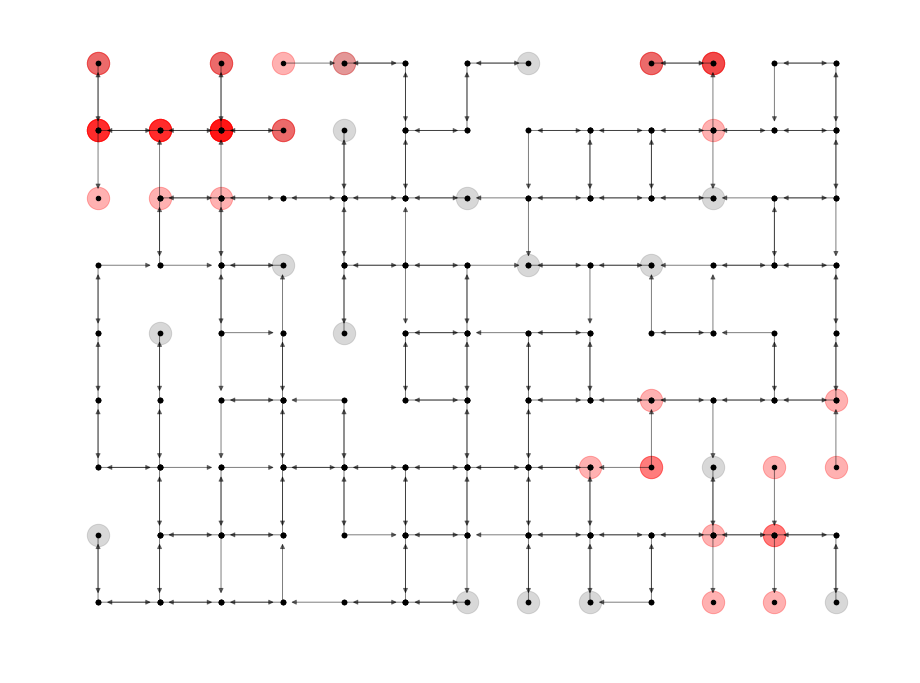

In [9]:
visualise_manoeuvre_graph(district_g)

In [10]:
print(len(district_g.nodes()))

520


In [12]:
[len(scc) for scc in district_scc]

[474, 20, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
def get_grafting_nodes_and_edges(
    g: nx.DiGraph,
    super_g: nx.DiGraph):
    
    for 
    nodes_to_add.append(nx.shortest_path(working_g, 1, 0)[1:-1])
    nodes_to_add.append(nx.shortest_path(working_g, 0, 1)[1:-1])
    
    edges_to_add = [(nodes_to_add[i],nodes_to_add[i+1]) for i in range(len(nodes_to_add)-1)]

for tail, head in city_g.in_edges(nodes_to_add[0]):
    if tail in district_g.nodes:
        edges_to_add.append((tail,head))
        nodes_to_add.append(tail)

for tail, head in city_g.in_edges(nodes_to_add[-1]):
    if tail in district_g.nodes:
        edges_to_add.append((tail,head))
        nodes_to_add.append(tail)
    

In [15]:
def add_connecting_grafts(
    g: nx.DiGraph,
    super_g: nx.DiGraph):

    g_scc = sorted(
        list(nx.strongly_connected_components(g)),
        key=len,
        reverse=True)
    working_g = super_g.copy()
    
    for i, scc in enumerate(g_scc[:2]):
        scc_coordinates = list(zip(*[super_g.nodes(data=True)[n]['coordinates'] for n in scc]))
        condensation_coordinates = tuple([np.mean(c) for c in scc_coordinates])
        condence_nodes(working_g, scc, i, condensation_coordinates)
        
nodes_to_add = nx.shortest_path(working_g, 1, 0)[1:-1]
edges_to_add = [(nodes_to_add[i],nodes_to_add[i+1]) for i in range(len(nodes_to_add)-1)]

for tail, head in city_g.in_edges(nodes_to_add[0]):
    if tail in district_g.nodes:
        edges_to_add.append((tail,head))
        nodes_to_add.append(tail)

for tail, head in city_g.in_edges(nodes_to_add[-1]):
    if tail in district_g.nodes:
        edges_to_add.append((tail,head))
        nodes_to_add.append(tail)

for tail, head in edges_to_add:
    edge_data=city_g.get_edge_data(tail, head)
    district_g.add_edge(
            tail,
            head,
            weight=edge_data['weight'],
            geometry=edge_data['geometry'],
            coordinates=edge_data['coordinates'],
            manoeuvre=edge_data['manoeuvre'])
nodes_coordinates = nx.get_node_attributes(city_g, 'coordinates')
for n in nodes_to_add:
    district_g.node[n]['coordinates'] = nodes_coordinates[n]
#     district_g.add_edge(*e, attr=city_g.get_edge_data(*e))

In [27]:
nx.shortest_path(working_g, 1, 0)[1:-1]

['211_t',
 '211_h',
 '212_t',
 '212_h',
 '-181_t',
 '-181_h',
 '-149_t',
 '-149_h',
 '-117_t',
 '-117_h',
 '-116_t',
 '-116_h',
 '-83_t',
 '-83_h',
 '-51_t',
 '-51_h',
 '-50_t',
 '-50_h',
 '-48_t',
 '-48_h',
 '-15_t',
 '-15_h',
 '-14_t',
 '-14_h',
 '-12_t',
 '-12_h',
 '11_t',
 '11_h',
 '43_t',
 '43_h',
 '-74_t',
 '-74_h',
 '73_t',
 '73_h',
 '-104_t',
 '-104_h',
 '-102_t',
 '-102_h',
 '100_t',
 '100_h',
 '99_t',
 '99_h',
 '131_t',
 '131_h',
 '164_t',
 '164_h',
 '165_t',
 '165_h',
 '197_t',
 '197_h']

In [17]:
# edges_to_add

In [18]:
# for tail, head in city_g.in_edges(nodes_to_add[0]):
#     if tail in district_g.nodes:
#         edges_to_add.append((tail,head))
#         nodes_to_add.append(tail)

In [19]:
# nodes_to_add[0]

164 disconnected nodes
962 straight drives
340 right turns
343 left turns
510 u-turns
54 dead ends


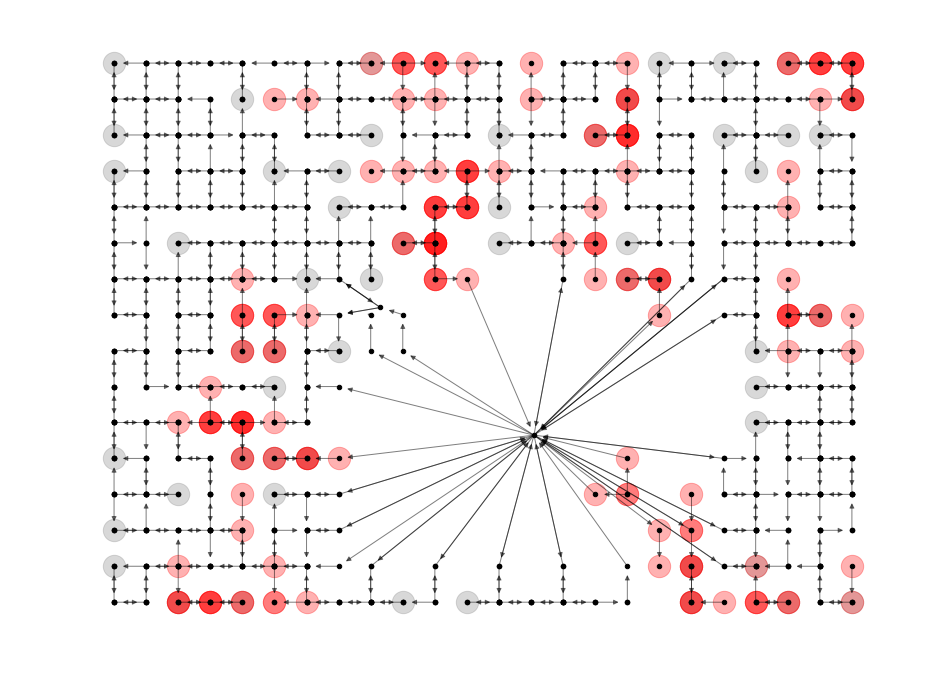

In [20]:
visualise_manoeuvre_graph(working_g)

96 disconnected nodes
446 straight drives
149 right turns
161 left turns
216 u-turns
20 dead ends


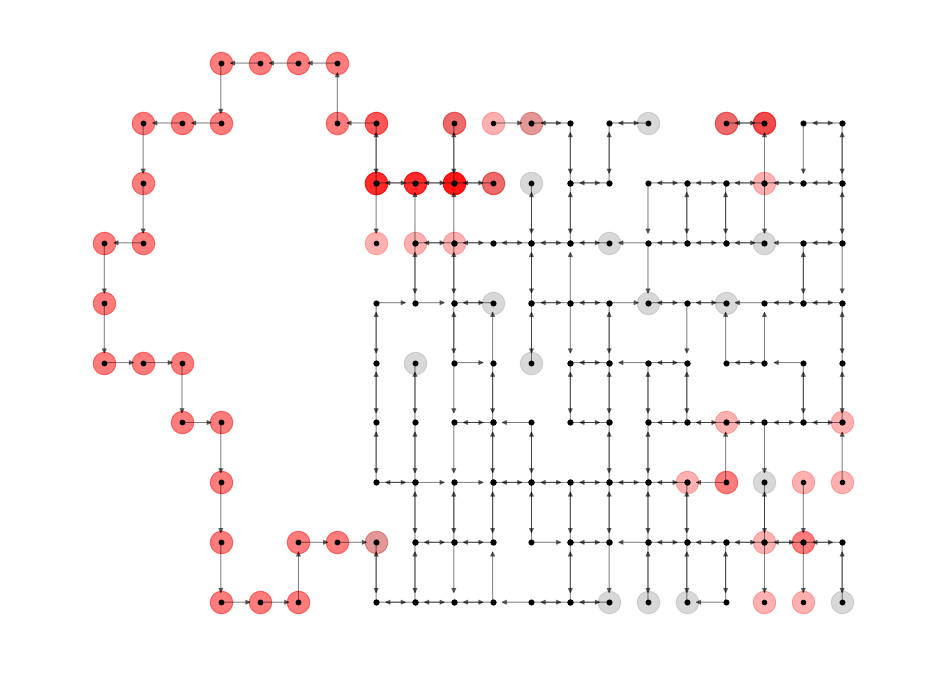

In [21]:
visualise_manoeuvre_graph(district_g)

In [22]:
# nodes_coordinates = nx.get_node_attributes(district_g, 'coordinates')
# disconnected_nodes = [nodes_coordinates[n]
#                       for n in list(district_g.nodes())
#                       if n not in connected_nodes]

In [23]:
nx.shortest_path(working_g, 0, 1)[1:-1]

['272_t', '272_h']

In [24]:
nx.shortest_path(working_g, 1, 0)[1:-1]

['211_t',
 '211_h',
 '212_t',
 '212_h',
 '-181_t',
 '-181_h',
 '-149_t',
 '-149_h',
 '-117_t',
 '-117_h',
 '-116_t',
 '-116_h',
 '-83_t',
 '-83_h',
 '-51_t',
 '-51_h',
 '-50_t',
 '-50_h',
 '-48_t',
 '-48_h',
 '-15_t',
 '-15_h',
 '-14_t',
 '-14_h',
 '-12_t',
 '-12_h',
 '11_t',
 '11_h',
 '43_t',
 '43_h',
 '-74_t',
 '-74_h',
 '73_t',
 '73_h',
 '-104_t',
 '-104_h',
 '-102_t',
 '-102_h',
 '100_t',
 '100_h',
 '99_t',
 '99_h',
 '131_t',
 '131_h',
 '164_t',
 '164_h',
 '165_t',
 '165_h',
 '197_t',
 '197_h']

In [25]:
# nx.condensation(city_manoeuvre_g, district_manoeuvre_subg)

In [26]:
a = sorted([d for n, d in manoeuvre_graph.degree()], reverse=True)
plt.hist(a)

NameError: name 'manoeuvre_graph' is not defined

In [ ]:
inverted_graph = get_inverted_graph(random_city)

In [ ]:
visualise_inverted_graph(inverted_graph)

In [ ]:
for n in inverted_graph.nodes():
    print(inverted_graph.out_edges(n))

In [ ]:
nx.is_strongly_connected(inverted_graph)

In [ ]:
def prune_u_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'make_u_turn':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)
                
def prune_left_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'turn_left':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)

In [ ]:
prune_u_turns(inverted_graph)
prune_left_turns(inverted_graph)

In [ ]:
visualise_inverted_graph(inverted_graph)